# COSC311 Project 2
*JJ McCauley*


## Clustering for Wireless Indoor Localization Dataset

Center for cluster 1: [-49.17102967 -55.15881326 -53.29144852 -50.03839442 -64.04537522
 -80.94240838 -81.85340314]

Center for cluster 2: [-35.43058824 -55.93411765 -55.72470588 -36.69411765 -67.32235294
 -71.59294118 -72.56941176]

Center for cluster 3: [-60.13346614 -55.20517928 -50.64940239 -61.28286853 -49.46613546
 -87.02191235 -86.99800797]

Center for cluster 4: [-62.47895792 -56.31262525 -60.56513026 -64.2004008  -70.27655311
 -82.95791583 -84.07815631]

Accuracy Score: 0.9544772386193097

              precision    recall  f1-score   support

           1       0.99      0.99      0.99       499
           2       1.00      0.85      0.92       500
           3       0.86      0.98      0.92       500
           4       0.99      0.99      0.99       500

    accuracy                           0.95      1999
   macro avg       0.96      0.95      0.95      1999
weighted avg       0.96      0.95      0.95      1999



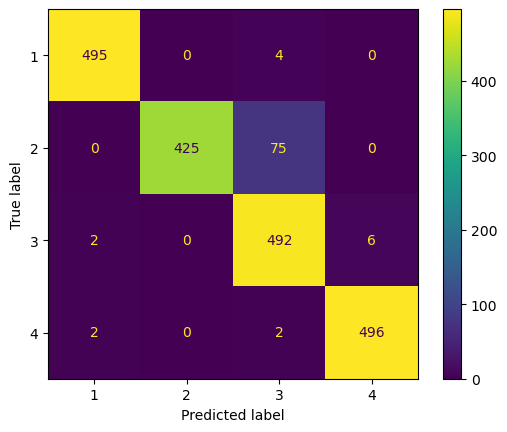

Accuracy for room 1: 0.9919839679358717
Accuracy for room 2: 0.85
Accuracy for room 3: 0.984
Accuracy for room 4: 0.992


In [19]:
'''Performing clustering on the first 7 columns of Wireless Indoor Localization Dataset'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
N_CLUSTERS = 4  # Defining number of clusters (known to be 4 for this dataset)

# Retreiving the data from the provided dataset
df = pd.read_csv('wifi_localization.txt', sep='	')
X = df.iloc[:, :7]  # Isolating first 7 columns
y_true = df.iloc[:, -1]  # Isolating last 'target' column

# Making & fitting the model and getting y prediction
clustering_model = KMeans(n_clusters=N_CLUSTERS, n_init=20, max_iter=500)
clustering_model.fit(X)
y_pred = clustering_model.predict(X)

# Get the predicted labels
pred_labels = np.zeros_like(y_pred)
for i in range(N_CLUSTERS):
    mask = (y_pred == i)
    pred_labels[mask] = mode(y_true[mask])[0]

# Outputting the center of each cluster
centers = clustering_model.cluster_centers_
for i, center in enumerate(centers):
    print(f"Center for cluster {i+1}: {centers[i]}\n")

# Output the total accuracy, classification report, and confusion matrix
print(f"Accuracy Score: {accuracy_score(y_true, pred_labels)}\n")
print(classification_report(y_true, pred_labels))
ConfusionMatrixDisplay.from_predictions(y_true, pred_labels)
plt.show()

# Finding & outputting the accuracy for each room using confusion matrix
cm = confusion_matrix(y_true, pred_labels)
cluster_accuracies = {}  # Storing for expandability
for cluster_i in range(N_CLUSTERS):
    true_positive = cm[cluster_i, cluster_i]  # Correctly classified samples
    total_assigned = cm[cluster_i, :].sum()  # All samples clustered under i
    cluster_accuracies[cluster_i] = true_positive/total_assigned

for cluster, accuracy in cluster_accuracies.items():
    print(f"Accuracy for room {cluster+1}: {accuracy}")



## PCA-based Handwritten Digits Classification 

In [ ]:
''' Conducting PCA analysis to reduce dimensionality of dataset, then optimizing SVM model '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.svm import SVC  # To be optimized after PCA
from sklearn.decomposition import PCA  # Reduce dimensionality
from sklearn.datasets import load_digits  # Dataset to be used
MINIMUM_VARIANCE = .90  # Explicitly stating known minimum variance for PCA

# Extracting X and y for PCA
loaded_data = load_digits(as_frame=True)
digits_df = loaded_data.frame
X = digits_df.iloc[:, :-1]
y = digits_df.iloc[:, -1]

# Finding minimum number of components using PCA
pca_temp = PCA()
pca_temp.fit(X)
cumulative_variance = np.cumsum(pca_temp.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= MINIMUM_VARIANCE) + 1
print(f"Number of Components Needed for {MINIMUM_VARIANCE} variance: {n_components}")

# Using PCA for dimensionality reduction
pca = PCA(n_components=n_components)
X_new = pca.fit_transform(X)
print(f"X's new shape after PCA: {X_new.shape}")


Number of Components Needed for 0.9 variance: 21
X's new shape after PCA: (1797, 21)


In [31]:
''' Finding optimal SVM parameters '''
svm_model = SVC()
params = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [i for i in np.arange(2.2, 2.3, .001)]  # Refined after broader searches
}
grid_search = GridSearchCV(estimator=svm_model, param_grid=params, cv=10, n_jobs=-1)
grid_search.fit(X_new, y)
print(f"Grid Search's Best Accuracy: {grid_search.best_score_}")
print(f"Grid Search's Best Parameters: {grid_search.best_params_}")
svm_optimized_model = grid_search.best_estimator_

Grid Search's Best Accuracy: 0.983854748603352
Grid Search's Best Parameters: {'C': 2.2899999999999903, 'kernel': 'rbf'}


CVT Average Accuracy: 0.9833055091819699


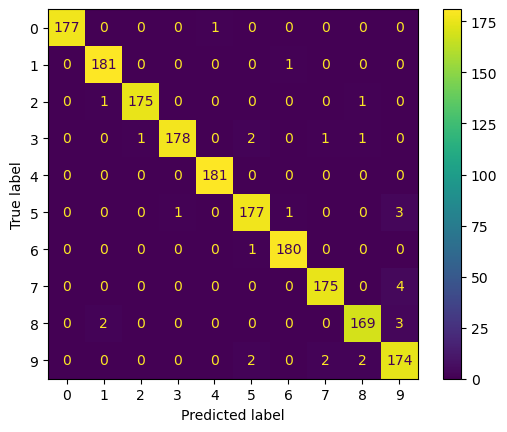

In [35]:
''' Using optimized model to do CVT & show accuracu and confusion matrix '''
y_pred = cross_val_predict(svm_optimized_model, X_new, y, cv=10)
print(f"CVT Average Accuracy: {accuracy_score(y_true=y, y_pred=y_pred).mean()}")
ConfusionMatrixDisplay.from_predictions(y_true=y, y_pred=y_pred)


## Regression for Median House Value Predictions

In [49]:
''' Using multiple linear regression to predict the median house value '''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Gathering the data from the dataset
housing_data = pd.read_csv('housing.csv')
X = housing_data[['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'median_income']]
y = housing_data['median_house_value']

# Determining correlation coefficients
correlations = housing_data[['housing_median_age', 'total_rooms', 'total_bedrooms', \
    'population', 'median_income', 'median_house_value']].corr()
# Getting just the correlations of median_house_value (without correlation to itself)
target_correlations = correlations['median_house_value'].drop('median_house_value')
# Extract 3 best features
chosen_features = target_correlations.abs().sort_values(ascending=False).head(3)
# Setting X to be just chosen features
X_new = X[chosen_features.index]
print(f"Top 3 features:\n{chosen_features}")

# Getting training & testing samples
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=.4, random_state=42)

# Running Multiple Linear Regression and showing performance metrics
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print('\nMean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Statistic: ', metrics.r2_score(y_test, y_pred))

Top 3 features:
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
Name: median_house_value, dtype: float64

Mean Absolute Error:  60354.797480020796
Mean Squared Error:  6538701065.948309
Root Mean Squared Error:  80862.23510359028
R2 Statistic:  0.5115652334230174
